In [3]:
import iris
import numpy as np
from netCDF4 import Dataset
import pylab as plt
import pandas as pd

In [4]:
confer_data = np.loadtxt('confer_snowdepth_salinity.csv', delimiter=',')

In [5]:
# get ist column and second column to snow salinty and snow depth data
confer_sp = confer_data[:,0]

confer_sd = confer_data[:,1]

# Add Mcfarlane et al data 

In [6]:
new_data = pd.read_excel('SnowSalinity_markus/MOSAiC_snowpits_13_salinity_data.xlsx')
salinity_new = new_data[new_data.columns[13]].values

# output names of all headers of pandas dataframe
depth_new = new_data[new_data.columns[6]].values * 100

flag1 = salinity_new != np.nan
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

#new_flag = (depth_new > 0) & (salinity_new!=0.1)
#depth_new = depth_new[new_flag]
#salinity_new = salinity_new[new_flag] 

flag1 = salinity_new != 0
flag2 = depth_new != np.nan
flag3 = depth_new >0

flag_new = flag1 & flag2 & flag3
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]




# combine salinity and depth data from confer and new data
all_sd = np.concatenate((confer_sd, depth_new))
all_sp = np.concatenate((confer_sp, salinity_new))


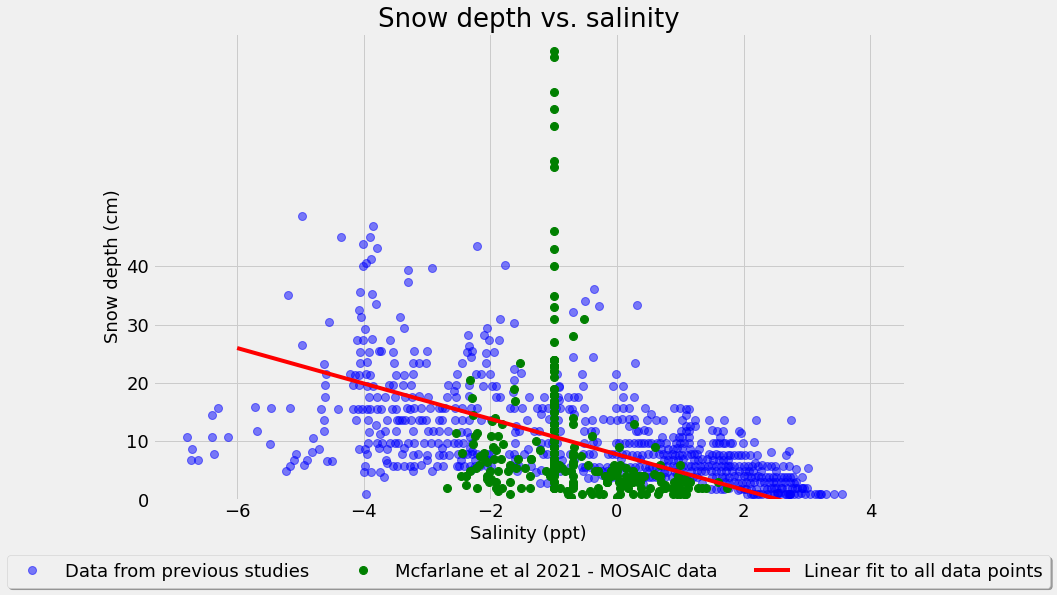

In [ ]:
#plt.plot(confer_sp, confer_sd, 'grey','o')
# rewrite the ablve line  with grey dots
plt.figure(figsize = (12, 8))
plt.style.use('fivethirtyeight')
#plt.plot(confer_sp, confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log(confer_sp), confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'Mcfarlane et al 2021 - MOSAIC data')

# calculate linear fit to all data points
z = np.polyfit(np.log10(salinity_new), depth_new, 1)
p = np.poly1d(z)

log_sp_fine = np.linspace(-6,4,100)
#plt.plot(np.log10(all_sp),p(np.log10(all_sp)),'r-', label = 'Linear fit to all data points')
plt.plot(log_sp_fine,p(log_sp_fine),'r-', label = 'Linear fit to all data points')


# set x axis to log scale
#plt.xscale('log')
plt.ylim(0, 80)
plt.yticks(np.arange(0, 50, 10), fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel('Salinity (ppt)', fontsize = 18)
plt.ylabel('Snow depth (cm)', fontsize = 18)
plt.title('Snow depth vs. salinity', fontsize = 26)
plt.grid(True)
# add legend to the bottom of the plot below the x axis and xlabel 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5, fontsize = 18)






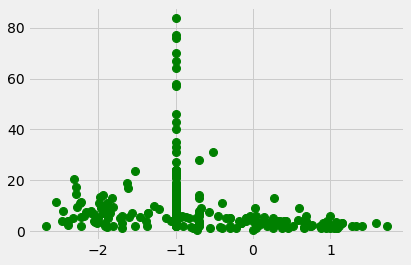

In [9]:
#z = np.polyfit(np.log10(salinity_new), depth_new, 5)
#p = np.poly1d(z)
# are any data in depth_new nan? or salinity_new  = 0
flag1 = salinity_new != 0
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

# calculate linear fit to all data points
z = np.polyfit(np.log10(salinity_new), depth_new, 1)
p = np.poly1d(z)    

plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'markus MOSAIC data')